### FFT - From Python Programming and Numerical Methods
* https://pythonnumericalmethods.berkeley.edu/notebooks/chapter24.00-Fourier-Transforms.html
  * https://medium.com/0xcode/fast-fourier-transform-fft-algorithm-implementation-in-python-b592099bdb27

In [78]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams.update({'font.size': 8})
%matplotlib inline

##### Note that, the input signal to FFT should have a length of power of 2. If the length is not, usually we need to fill up zeros to the next power of 2 size.

In [79]:
def FFT(x):
    """
    A recursive implementation of the 1D Cooley-Tukey FFT, the input should have a length of power of 2. 
    """
    N = len(x)
    
    if N == 1:
        return x
    else:
        X_even = FFT(x[::2])
        X_odd = FFT(x[1::2])
        factor = np.exp(-2j*np.pi*np.arange(N)/ N)
        
        X = np.concatenate( [X_even+factor[:int(N/2)]*X_odd, X_even+factor[int(N/2):]*X_odd])
        return X

len(t):128


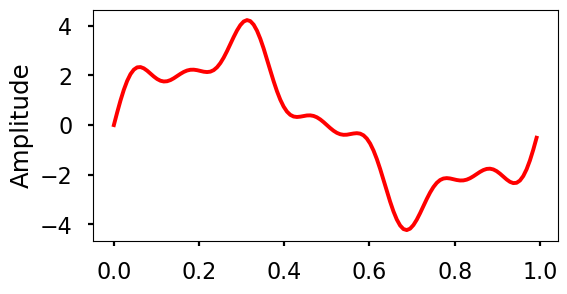

In [80]:
sr = 128     # sampling rate
ts = 1.0/sr  # sampling interval
t = np.arange(0,1,ts)
print(f'len(t):{len(t)}')

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (6, 3))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

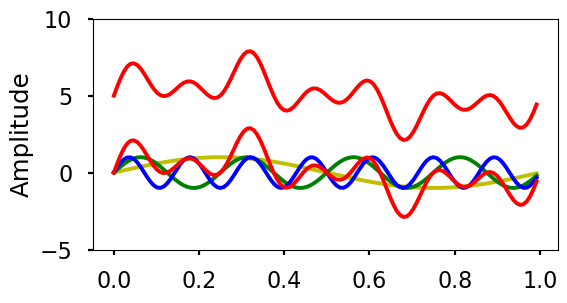

In [93]:
freq = 1.
x1 = np.sin(2*np.pi*freq*t)
x = x1.copy()

freq = 4
x2 = np.sin(2*np.pi*freq*t)
x += x2

freq = 7   
x3 = np.sin(2*np.pi*freq*t)
#x += 0.5* np.sin(2*np.pi*freq*t)
x += x3
xo = x.copy()
x += 5

plt.figure(figsize = (6, 3))
plt.ylim(-5,10)
plt.plot(t, x1, 'y')
plt.plot(t, x2, 'g')
plt.plot(t, x3, 'b')

plt.plot(t, xo, 'r')
plt.plot(t, x, 'r')

plt.ylabel('Amplitude')

plt.show()

### TRY IT! 
##### Use the FFT function to calculate the Fourier transform of the above signal. Plot the amplitude spectrum for both the two-sided and one-side frequencies.

mean(xo):1.9081958235744878e-17
mean(x):5.0


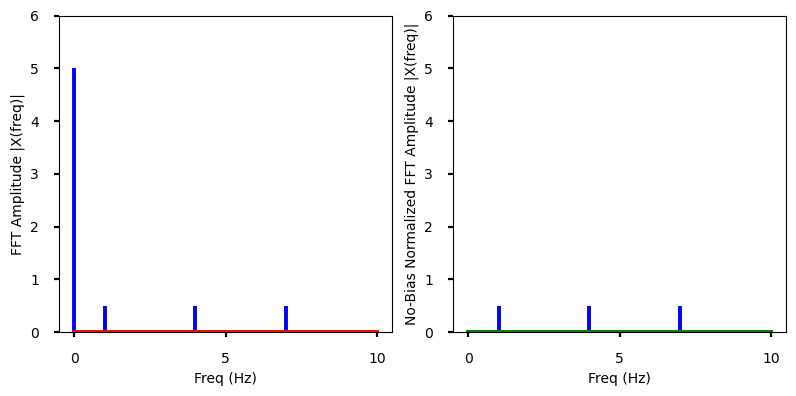

In [96]:
print(f'mean(xo):{np.mean(xo)}')
print(f'mean(x):{np.mean(x)}')
X=FFT(x)

N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 
#print(f'sampling rate: {sr}\nlen(x): {len(x)}\nLength of FFT N: {N}\nT = N/sr: {T}\nn=np.arange(N):\n{n}\nfreq = n/T:\n{freq}')

plt.figure(figsize = (8, 4))
plt.subplot(121)
plt.xticks(fontsize=10)#, rotation=90)
plt.yticks(fontsize=10)#
plt.ylim(0,6)
plt.stem(freq[:11], abs(X/N)[:11], 'b', markerfmt=" ", basefmt="-r")
plt.xlabel('Freq (Hz)', fontsize=10)
plt.ylabel('FFT Amplitude |X(freq)|', fontsize=10)


x2 = x - np.mean(x) # DC 성분 제거
X2=FFT(x2)

N2 = len(X2)
n2 = np.arange(N2)
T2 = N2/sr
freq2 = n2/T2 

plt.subplot(122)
plt.xticks(fontsize=10)#, rotation=90)
plt.yticks(fontsize=10)#
plt.ylim(0,6)
plt.stem(freq2[:11], abs(X2/N2)[:11], 'b', markerfmt=" ", basefmt="-g")
plt.xlabel('Freq (Hz)', fontsize=10)
plt.ylabel('No-Bias Normalized FFT Amplitude |X(freq)|', fontsize=10)

s='''
n_oneside = N//2 # Get the one-sided specturm
f_oneside = freq[:n_oneside] # get the one side frequency

# normalize the amplitude
X_oneside =X[:n_oneside]/n_oneside

plt.subplot(133)
plt.xticks(fontsize=10)#, rotation=90)
plt.yticks(fontsize=10)#
plt.stem(f_oneside, abs(X_oneside), 'b', markerfmt=" ", basefmt="-g")
plt.xlabel('Freq (Hz)', fontsize=10)
plt.ylabel('Normalized FFT Amplitude |X(freq)|', fontsize=10)
'''
plt.tight_layout()
plt.show() 

### TRY IT! 
##### Generate a simple signal for length 2048, and time how long it will run the FFT and compare the speed with the DFT.

In [5]:
def gen_sig(sr):
    '''
    function to generate
    a simple 1D signal with
    different sampling rate
    '''
    ts = 1.0/sr
    t = np.arange(0,1,ts)

    freq = 1.
    x = 3*np.sin(2*np.pi*freq*t)
    return x

In [6]:
# sampling rate =2048
sr = 2048
%timeit FFT(gen_sig(sr))

12.8 ms ± 37 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We can see that, for a signal with length 2048 (about 2000), this implementation of FFT uses 16.9 ms instead of 120 ms using DFT. Note that, there are also a lot of ways to optimize the FFT implementation which will make it faster. In the next section, we will take a look of the Python built-in FFT functions, which will be much faster.

In [7]:
N=100
factor = \
          np.exp(-2j*np.pi*np.arange(N)/ N)

In [9]:
factor2 = np.exp(-2j*np.pi*np.arange(N)/ N)

In [12]:
factor == factor2

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [10]:
factor2

array([ 1.00000000e+00+0.00000000e+00j,  9.98026728e-01-6.27905195e-02j,
        9.92114701e-01-1.25333234e-01j,  9.82287251e-01-1.87381315e-01j,
        9.68583161e-01-2.48689887e-01j,  9.51056516e-01-3.09016994e-01j,
        9.29776486e-01-3.68124553e-01j,  9.04827052e-01-4.25779292e-01j,
        8.76306680e-01-4.81753674e-01j,  8.44327926e-01-5.35826795e-01j,
        8.09016994e-01-5.87785252e-01j,  7.70513243e-01-6.37423990e-01j,
        7.28968627e-01-6.84547106e-01j,  6.84547106e-01-7.28968627e-01j,
        6.37423990e-01-7.70513243e-01j,  5.87785252e-01-8.09016994e-01j,
        5.35826795e-01-8.44327926e-01j,  4.81753674e-01-8.76306680e-01j,
        4.25779292e-01-9.04827052e-01j,  3.68124553e-01-9.29776486e-01j,
        3.09016994e-01-9.51056516e-01j,  2.48689887e-01-9.68583161e-01j,
        1.87381315e-01-9.82287251e-01j,  1.25333234e-01-9.92114701e-01j,
        6.27905195e-02-9.98026728e-01j,  6.12323400e-17-1.00000000e+00j,
       -6.27905195e-02-9.98026728e-01j, -1.25333234

In [11]:
factor

array([ 1.00000000e+00+0.00000000e+00j,  9.98026728e-01-6.27905195e-02j,
        9.92114701e-01-1.25333234e-01j,  9.82287251e-01-1.87381315e-01j,
        9.68583161e-01-2.48689887e-01j,  9.51056516e-01-3.09016994e-01j,
        9.29776486e-01-3.68124553e-01j,  9.04827052e-01-4.25779292e-01j,
        8.76306680e-01-4.81753674e-01j,  8.44327926e-01-5.35826795e-01j,
        8.09016994e-01-5.87785252e-01j,  7.70513243e-01-6.37423990e-01j,
        7.28968627e-01-6.84547106e-01j,  6.84547106e-01-7.28968627e-01j,
        6.37423990e-01-7.70513243e-01j,  5.87785252e-01-8.09016994e-01j,
        5.35826795e-01-8.44327926e-01j,  4.81753674e-01-8.76306680e-01j,
        4.25779292e-01-9.04827052e-01j,  3.68124553e-01-9.29776486e-01j,
        3.09016994e-01-9.51056516e-01j,  2.48689887e-01-9.68583161e-01j,
        1.87381315e-01-9.82287251e-01j,  1.25333234e-01-9.92114701e-01j,
        6.27905195e-02-9.98026728e-01j,  6.12323400e-17-1.00000000e+00j,
       -6.27905195e-02-9.98026728e-01j, -1.25333234